<font size=6><b>lec01. ML 기초

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ! pip install scikit-learn

 <img src="https://scikit-learn.org/stable/_static/ml_map.png">

# 분석 프로세스

<pre><font color=red><b>
1. Data Load
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석
    - 통계적 데이터 분포 확인
    - 차트 시각화
    
3. Feature Engineering : 전처리(preprocessing), 가공(Engineering)
    - 타입변환 (날짜, 카테고리변환(ABC->123)
    - 결측처리 (버리기:drona, 채우기:fillna, 모델 채우기)
    - 바이닝(범주화 : cut, quct)
    - 인코딩(라벨인코딩, 원핫인코딩 , 더미)
    - 정규화(스케일링 : MinMaxScaler, StandardScaler, RobustScaler, log)
    - 이상치(Outlier)
4. 모델 선정(Model Selection : pycaret)
    - 회귀(Regression)
    - 분류(Classigication)
    - 군집(Clustering, PCA)
    
5. 모델 학습 및 예측(train_test_split & fit & predict)
6. 모델 검증 및 평가 (Validation & Evaluation metrics)
7. 하이퍼파미터 튜닝(Hyper-parameter optimization)
8. 모델 저장 및 배포(Model Save & Deployment)     

# 결측
* None,np.nan
* 삭제 : drona
* 보간(대체해서 채우기) : fillna
    * 모델, 통계적수치

In [3]:
df = pd.DataFrame({"name":[None,np.nan,"NaN","allen","king"],"score": ["A",np.nan,np.nan,"D","C"]})
df.head()

,name,score
0,None,A
1,NaN,NaN
2,NaN,NaN
3,allen,D
4,king,C


## 결측 삭제
<pre>
<b>DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, inplace=False</b>
thresh=_NoDefault.no_default, subset=None)[source]

axis{0 or ‘index’, 1 or ‘columns’}, default 0  
how{‘any’, ‘all’}, default ‘any’

</pre>


In [4]:
df.drop(1, axis=0)

,name,score
0,None,A
2,NaN,NaN
3,allen,D
4,king,C


In [5]:
df.drop('name', axis=1)

,score
0,A
1,NaN
2,NaN
3,D
4,C


In [6]:
df

,name,score
0,None,A
1,NaN,NaN
2,NaN,NaN
3,allen,D
4,king,C


In [7]:
df.dropna(how="all")  # 1	NaN	NaN

,name,score
0,None,A
2,NaN,NaN
3,allen,D
4,king,C


In [8]:
df.dropna(how="any")  # 컬럼 전체에서 단 하나라로 nan이 있으면 삭제

,name,score
3,allen,D
4,king,C


* 결측 체크
<pre>
df.isna()   df.notna()
df.isnull() df.notnull()

In [9]:
df[df['score'].notna()]

,name,score
0,None,A
3,allen,D
4,king,C


In [10]:
df.isna()
#df[df['score'].isna()]

,name,score
0,True,False
1,True,True
2,False,True
3,False,False
4,False,False


* 컬럼별 결측 개수

In [11]:
df.isna().sum()

name     2
score    2
dtype: int64

* 결측이 있는 컬럼만 가져오기

In [12]:
print( df.isna().sum()[df.isna().sum()>0].index.values )

['name' 'score']


## 결측 보간
<pre>
<b>DataFrame.fillna(value=None, *, method=None, axis=None, inplace=False,</b>
limit=None, downcast=None)

axis {0 : index / 1 : columns}
method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None


In [13]:
df

,name,score
0,None,A
1,NaN,NaN
2,NaN,NaN
3,allen,D
4,king,C


* DataFrame 전체를 대상

In [14]:
df.fillna('999999')

,name,score
0,999999,A
1,999999,999999
2,NaN,999999
3,allen,D
4,king,C


* 특정 컬럼 대상

In [15]:
df['score'].fillna('F')

0    A
1    F
2    F
3    D
4    C
Name: score, dtype: object

* 앞/뒤 값을 이용해서 채우기
* method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None

In [16]:
df

,name,score
0,None,A
1,NaN,NaN
2,NaN,NaN
3,allen,D
4,king,C


In [17]:
df['score'].fillna(method='bfill')

0    A
1    D
2    D
3    D
4    C
Name: score, dtype: object

In [18]:
df['score'].fillna(method='ffill')

0    A
1    A
2    A
3    D
4    C
Name: score, dtype: object

In [19]:
df['score'].fillna(method='pad')

0    A
1    A
2    A
3    D
4    C
Name: score, dtype: object

## 결측 대체
* 사용자 지정 값
* 통계적 수치  
    평균 : mean()  
    최빈도 : mode()  
    중앙 : median()  
* 모델 예측 값

In [20]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,np.nan,4000]})
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,NaN
4,king,A,4000.0


### 사용자 지정 값
* 각 컬럼마다 사용자 지정값으로 채우기

In [21]:
dic = {"name" : "AAA" , "score" : "F", "sal" : 999}
df.fillna(dic)

,name,score,sal
0,smith,A,1000.0
1,AAA,B,1000.0
2,jones,B,3000.0
3,allen,A,999.0
4,king,A,4000.0


### 통계적 수치
    * 평균 : 결측제외합 / 결측제외갯수
    * 중앙값 : 크기 순 나열 후 순서상 딱 가운데,  아웃라이어에 영향을 받지 않는다
        * 짝수개 : _ _ ( ? ) _ _  앞뒤 두 수의 평균값
        * 홀수개 : 정 중앙값
    * 빈도 : 가장 많은 출현 값    

In [22]:
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,NaN
4,king,A,4000.0


In [23]:
# 평균 : 1000 1000 3000 4000 / 4
print( df['sal'].mean(), df['sal'].median() )  #------ scaler 리턴
print(  df['sal'].mode().values[0] )           #------ Series 리턴

2250.0 2000.0
1000.0


In [24]:
np.mean([10,10,30,40]),  np.median([10,10,30,40])

(22.5, 20.0)

In [25]:
np.mean([10,10,30,100]),  np.median([10,10,30,100])

(37.5, 20.0)

* sal 결측을 sal의 평균값으로 채우기

In [26]:
# print( df['sal'].mean())
# df['sal'].fillna( 2250 )

df['sal'].fillna( df['sal'].mean() )


0    1000.0
1    1000.0
2    3000.0
3    2250.0
4    4000.0
Name: sal, dtype: float64

* sal 결측을 score의 <b>그룹 평균값으로 채우기</b>
    * fillna()
    * lambda()

In [27]:
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,NaN
4,king,A,4000.0


In [28]:
df.groupby('score')['sal'].mean()

score
A    2500.0
B    2000.0
Name: sal, dtype: float64

In [29]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,np.nan,4000]})
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,NaN
4,king,A,4000.0


In [30]:
#            df['sal'].fillna( df['sal'].mean() )
df['sal'] =  df['sal'].fillna(  df.groupby('score')['sal'].transform("mean")    )     
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,2500.0
4,king,A,4000.0


In [31]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,np.nan,4000]})
df['sal']  = df.groupby('score')['sal'].transform(   lambda g : g.fillna(g.mean())  )
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,2500.0
4,king,A,4000.0


### 모델 예측 값 
* bike_demand의 windspeed 0채우기 참조

# 타입

In [87]:
from datetime import datetime

In [80]:
str_val = '2022-01-01'
dt = datetime.strptime(str_val, '%Y-%m-%d')
dt

datetime.datetime(2022, 1, 1, 0, 0)

In [86]:
today_val = datetime.today()
print(  today_val , type(today_val)  )
print(  today_val.strftime('%Y-%m-%d')  )

2023-03-08 14:42:13.316965 <class 'datetime.datetime'>
2023-03-08


In [100]:
pd.date_range('2022-01-01','2022-03-08', freq='MS')

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01'], dtype='datetime64[ns]', freq='MS')

In [102]:
pd.date_range('2022-01-01','2022-03-08', freq='M')

DatetimeIndex(['2022-01-31', '2022-02-28'], dtype='datetime64[ns]', freq='M')

In [120]:
df = pd.DataFrame( {'sdate':'1999-01-01', 
                    'edate' : pd.date_range('2022-01-01','2022-01-05', freq='D') }
                )
df.head()

,sdate,edate
0,1999-01-01,2022-01-01
1,1999-01-01,2022-01-02
2,1999-01-01,2022-01-03
3,1999-01-01,2022-01-04
4,1999-01-01,2022-01-05


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sdate   5 non-null      object        
 1   edate   5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 208.0+ bytes


In [123]:
df['sdate2'] = df['sdate'].astype('datetime64[ns]')
df['sdate3'] = pd.to_datetime(df['sdate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sdate   5 non-null      object        
 1   edate   5 non-null      datetime64[ns]
 2   sdate2  5 non-null      datetime64[ns]
 3   sdate3  5 non-null      datetime64[ns]
dtypes: datetime64[ns](3), object(1)
memory usage: 288.0+ bytes


In [117]:
df['y'] = df['edate'].dt.year
df['m'] = df['edate'].dt.month
df['d'] = df['edate'].dt.day
df['h'] = df['edate'].dt.hour
df['mm'] = df['edate'].dt.minute
df['second'] = df['edate'].dt.second
df['w'] = df['edate'].dt.dayofweek
df.head()

,sdate,edate,y,m,d,h,mm,second,w
0,1999-01-01,2022-01-01,2022,1,1,0,0,0,5
1,1999-01-01,2022-01-02,2022,1,2,0,0,0,6
2,1999-01-01,2022-01-03,2022,1,3,0,0,0,0
3,1999-01-01,2022-01-04,2022,1,4,0,0,0,1
4,1999-01-01,2022-01-05,2022,1,5,0,0,0,2


# 인코딩

## 라벨인코딩
* name_le : 라벨인코딩
    * <font color=red><b> vector(array-like) 1차원

In [34]:
from sklearn.preprocessing import LabelEncoder

In [77]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,np.nan,4000]})

le = LabelEncoder()
# le.fit(df['name'])
# res = le.transform(df['name'])
res = le.fit_transform(df['name'])
print(df['name'].values)
print(res)
df['name_le'] = res
df.head()

['smith' nan 'jones' 'allen' 'king']
[3 4 1 0 2]


,name,score,sal,name_le
0,smith,A,1000.0,3
1,NaN,B,1000.0,4
2,jones,B,3000.0,1
3,allen,A,NaN,0
4,king,A,4000.0,2


## 원핫인코딩
* score : 원핫인코딩
    * <font color=red><b> metrics 2차원

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
print( df['score'] )
print( df['score'].shape)

# ================= series --> array.reshape()함수를 사용
# print( np.array(df['score']) )
print( df['score'].values )
print( df['score'].values.shape )

print( df['score'].values.reshape(-1,1) )
print( df['score'].values.reshape(-1,1).shape )

0    A
1    B
2    B
3    A
4    A
Name: score, dtype: object
(5,)
['A' 'B' 'B' 'A' 'A']
(5,)
[['A']
 ['B']
 ['B']
 ['A']
 ['A']]
(5, 1)


In [48]:
oh = OneHotEncoder(sparse=False)
oh.fit(  df['score'].values.reshape(-1,1) )
res = oh.transform( df['score'].values.reshape(-1,1) )
print(df['score'].values)
print(res)
    # df['name_le'] = res
# df.head()

['A' 'B' 'B' 'A' 'A']
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [57]:
df['score'].value_counts().index

Index(['A', 'B'], dtype='object')

In [58]:
df[['A', 'B']] = res
df.head()

,name,score,sal,name_le,A,B
0,smith,A,1000.0,3,1.0,0.0
1,NaN,B,1000.0,4,0.0,1.0
2,jones,B,3000.0,1,0.0,1.0
3,allen,A,2500.0,0,1.0,0.0
4,king,A,4000.0,2,1.0,0.0


## get_dummies()
* name : pd.get_dummies()
* <font color=red><b>pd.get_dummies(df, dummy_na=False , columns=['name'])</b></font>
<pre>
<b>pandas.get_dummies(data, sparse=False, 
                dummy_na=False,  
                columns=None</b> 
                prefix=None, prefix_sep='_', 
                drop_first=False, dtype=None)


In [69]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,np.nan,4000]})

df2 = pd.get_dummies(df['name'])

In [70]:
df = pd.concat([df, df2], axis=1)
df = df.drop('name', axis=1)
df.head()

,score,sal,allen,jones,king,smith
0,A,1000.0,0,0,0,1
1,B,1000.0,0,0,0,0
2,B,3000.0,0,1,0,0
3,A,NaN,1,0,0,0
4,A,4000.0,0,0,1,0


In [72]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,np.nan,4000]})
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,NaN
4,king,A,4000.0


In [75]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,np.nan,4000]})
# df
pd.get_dummies(df, dummy_na=False , columns=['name'])

,score,sal,name_allen,name_jones,name_king,name_smith
0,A,1000.0,0,0,0,1
1,B,1000.0,0,0,0,0
2,B,3000.0,0,1,0,0
3,A,NaN,1,0,0,0
4,A,4000.0,0,0,1,0


# 바이닝

## cut()

In [127]:
cutdata = pd.cut([1,2,3,4,5,6,7,8,9,10], 5)
print(cutdata.describe())
print(cutdata.value_counts())

              counts  freqs
categories                 
(0.991, 2.8]       2    0.2
(2.8, 4.6]         2    0.2
(4.6, 6.4]         2    0.2
(6.4, 8.2]         2    0.2
(8.2, 10.0]        2    0.2
(0.991, 2.8]    2
(2.8, 4.6]      2
(4.6, 6.4]      2
(6.4, 8.2]      2
(8.2, 10.0]     2
dtype: int64


In [128]:
my_range = [0, 3,7,10]  #0~3  4~7 8~10
res = pd.cut([1,2,3,4,5,6,7,8,9,10],   my_range )
res.describe()

,counts,freqs
categories,,
"(0, 3]",3,0.3
"(3, 7]",4,0.4
"(7, 10]",3,0.3


In [129]:
my_range = [0, 3, 7, 10]  #0~3  4~7 8~10
my_label = ['대','중','소']
res = pd.cut([1,2,3,4,5,6,7,8,9,10],   my_range, labels=my_label )
res.describe()

,counts,freqs
categories,,
대,3,0.3
중,4,0.4
소,3,0.3


## qcut()

In [131]:
np.random.seed(989899)
ndata = np.random.normal(size=100)
qdata = pd.qcut(ndata, 5)
qdata.describe()

,counts,freqs
categories,,
"(-2.262, -0.611]",20,0.2
"(-0.611, -0.0828]",20,0.2
"(-0.0828, 0.414]",20,0.2
"(0.414, 0.991]",20,0.2
"(0.991, 2.509]",20,0.2


# 정규화

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F276E5D47566A1CA329">

<img src="https://velog.velcdn.com/images%2Fgooook%2Fpost%2F38b370c1-015d-40ba-81f1-920781ade8c9%2FRegression-terminologies-Page-3.png">

<img src="https://qph.cf2.quoracdn.net/main-qimg-47e35df47f8539c6460ca450daa3f0da-lq">

* 설명 불가능한 에러 : <b>잔차</b>제곱합
    * 잔차(Residual) : 실제값 - 예측값
    * $SSR = \sum_{i=1}^n ( {Y} - \hat{Y_i} )^2 $
    * SSR(<b>Residual</b>    sum of squares)
    * SSE(Error         sum of squares)
<br><br>
* 설명가능한 에러
    * $SSE = \sum_{i=1}^n ( \hat{Y_i} - \bar{Y})^2 $
    * SSE(<b>Explained</b>   sum of squares)
    * SSR(Regression sum of Squares)
<br><br>
* SST(total sum of squares)  : <b>편차</b>제곱합  
    * $\sum_{i=1}^n ( Y_i - \bar{Y})^2 $ 
<br><br>
* R-squared (R제곱;결정계수) : 총 에러 중 설명가능한 에러의 비율
    * $R^2 = SSE / SST $
    * $R^2 = 1 - (SSR / SST) $

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F0odPk%2FbtqQjnMlwKM%2FhXlWLCPcyyZLVWUJjruEe0%2Fimg.png">

## 스케일링(Scaling)
* 데이터의 값이 너무 크거나 작아 변수의 영향이 제대로 반영되지 않을 경우, 알고리즘의 계산 과정에서 0으로 수렴하거나 값이 너무 커져버리는 경우 값의 수치를 변환해 사용
* StandardScaler	기본 스케일. 평균과 표준편차 사용
* MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
* MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
* RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### StandardScaler 
* 정규화 == 표준화 == 표준정규분포
    * 표준정규분포 : (평균:0), (표준편차:1) 분포
    * 표준화(Z-Score) = 편차/표준편차
    * 모수 : 평균, 분산

In [137]:
df = pd.DataFrame({"score": ["A","B","B","A","C"], "le_score":[0,1,1,0,2]})
df

,score,le_score
0,A,0
1,B,1
2,B,1
3,A,0
4,C,2


In [138]:
df.describe()

,le_score
count,5.00000
mean,0.80000
std,0.83666
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,2.00000


In [141]:
np.mean([0,1,1,0,2]), np.std([0,1,1,0,2], ddof=1)

(0.8, 0.8366600265340756)

In [145]:
sc = StandardScaler()
sc.fit(df["le_score"].values.reshape(-1,1))
res = sc.transform(df["le_score"].values.reshape(-1,1))
print(df["le_score"].values)
print(res)

[0 1 1 0 2]
[[-1.06904497]
 [ 0.26726124]
 [ 0.26726124]
 [-1.06904497]
 [ 1.60356745]]


In [146]:
print(df["le_score"].values)
    
sc_list = [StandardScaler(), MinMaxScaler(), RobustScaler()]
for sc in sc_list:
    sc.fit(df["le_score"].values.reshape(-1,1))
    res = sc.transform(df["le_score"].values.reshape(-1,1))
    print(res)

[0 1 1 0 2]
[[-1.06904497]
 [ 0.26726124]
 [ 0.26726124]
 [-1.06904497]
 [ 1.60356745]]
[[0. ]
 [0.5]
 [0.5]
 [0. ]
 [1. ]]
[[-1.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 1.]]


<AxesSubplot: xlabel='le_score', ylabel='Density'>

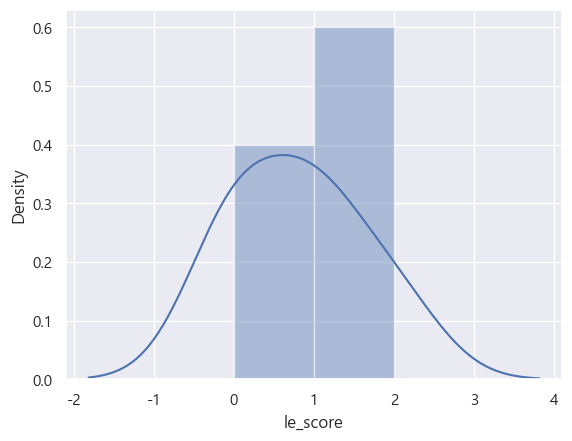

In [147]:
sns.distplot(df['le_score'], hist=True)

[[-1.06904497]
 [ 0.26726124]
 [ 0.26726124]
 [-1.06904497]
 [ 1.60356745]]


<AxesSubplot: xlabel='le_score2', ylabel='Density'>

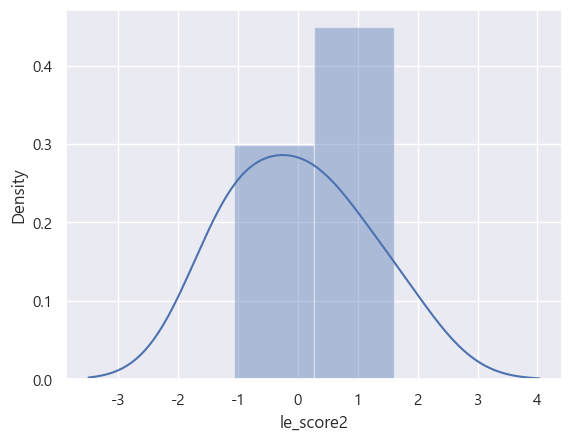

In [148]:
sc = StandardScaler()
sc.fit(df["le_score"].values.reshape(-1,1))
res = sc.transform(df["le_score"].values.reshape(-1,1))
print(res)

df['le_score2'] = res
sns.distplot(df['le_score2'], hist=True)